In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Initialisation(dimensions):
    
    parametres={}
    C= len(dimensions)
    
    for c in range(1,C):
        
        parametres['W'+ str(c)]= np.random.randn(dimensions[c], dimensions[c-1])
        parametres['b'+ str(c)]= np.random.randn(dimensions[c],1)
        
    return parametres

In [3]:
def forward_propagation(X, parametres):
    
    activations= {'A0': X}
    C= len(parametres) // 2
    
    for c in range(1,C+1):
        
        Z= parametres['W' + str(c)].dot(activations['A' + str(c-1)])+parametres['b' + str(c)]
        activations['A' + str(c)]= 1/(1+np.exp(-Z))
        
    return activations

In [4]:
def back_propagation(y, activations, parametres):
    
    m= y.shape[1]
    
    C= len(parametres) // 2
    dZ= activations['A' + str(C)]-y
    gradients={}
    
    for c in reversed(range(1,C+1)):
        
        gradients['dW' + str(c)]= 1/m * np.dot(dZ, activations['A' + str(c-1)].T)
        gradients['db' + str(c)]= 1/m * np.sum(dZ, axis=1, keepdims= True)
        
        if(c>1):
            
            dZ= np.dot(parametres['W' + str(c)].T, dZ) * activations['A' + str(c-1)] * (1-activations['A' + str(c-1)])
        
    return gradients

In [5]:
def update(gradients, parametres, learning_rate):
    
    C= len(parametres) // 2
    
    for c in range(1,C+1):
        
        parametres['W'+ str(c)]= parametres['W'+ str(c)]-learning_rate*gradients['dW'+ str(c)]
        parametres['b'+ str(c)]= parametres['b'+ str(c)]-learning_rate*gradients['db'+ str(c)]
        
    return parametres

In [31]:
def predict(X, parametres):
    
    activations= forward_propagation(X, parametres)
    C= len(activations)-1
    A= activations['A' + str(C)]
    return A>=0.5

In [32]:
def log_loss(activations,y):
    
    epsilon= 1e-15
    C= len(activations)-1
    return -1/(y.shape[1])*np.sum(y*np.log(activations['A' + str(C)]+epsilon)+(1-y)*np.log(1-activations['A' + str(C)]+epsilon))

In [7]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [33]:
def neural_network(X_train, y_train, X_test, y_test, hidden_layers=(32, 32, 32), learning_rate=0.1, n_iter=1000):
    
    np.random.seed(0)
    
    #Initialisation de W et b

    
    dimensions= list(hidden_layers)
    dimensions.insert(0, X_train.shape[0])
    dimensions.append(y_train.shape[0])
    parametres= Initialisation(dimensions)
    
    Loss_train=[]
    Loss_test=[]
    acc_train=[]
    acc_test=[]
    
    
    
    for i in tqdm(range(n_iter)):
        
        #forward propagation
    
        activations= forward_propagation(X_train, parametres)
    
        
        #backward propagation
        
        gradients= back_propagation(y_train, activations, parametres)
        
        #mise à jour des paramètres
        
        parametres= update(gradients, parametres, learning_rate)
        
        if i%10==0:
            
            #log loss and accuracy for train dataset
            
            C= len(parametres) // 2
            Loss_train.append(log_loss(activations,y_train))
            y_pred= predict(X_train, parametres)
            acc_train.append(accuracy_score(y_train.flatten(),y_pred.flatten()))
            
            #log loss and accuracy for test dataset
            
            activations_test= forward_propagation(X_test, parametres)
            Loss_test.append(log_loss(activations_test, y_test))
            y_pred_test= predict(X_test, parametres)
            acc_test.append(accuracy_score(y_test.flatten(),y_pred_test.flatten()))
            
            
            
            
    #Graphiques
            
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(Loss_train, label="train loss")
    plt.plot(Loss_test, label="test loss")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(acc_train, label="train accuracy")
    plt.plot(acc_test, label="test accuracy")
    plt.legend()
    plt.show()
        
    return parametres
        
    

In [9]:
import h5py


def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test= load_data()

In [11]:
y_train_reshape= y_train.T

In [12]:
y_test_reshape= y_test.T

In [13]:
X_train_reshape= X_train.reshape((X_train.shape[0],-1))/X_train.max()

In [14]:
X_train_reshape= X_train_reshape.T

In [15]:
X_test_reshape= X_test.reshape((X_test.shape[0],-1))/X_train.max()
X_test_reshape= X_test_reshape.T

100%|█████████████████████████████████████| 10000/10000 [04:04<00:00, 40.88it/s]


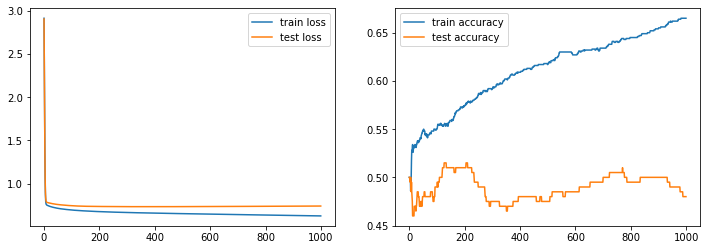

In [35]:
parametres_2_layers= neural_network(X_train_reshape, y_train_reshape, X_test_reshape, 
                            y_test_reshape,
                            hidden_layers=(32,32), learning_rate=0.01, n_iter=10000)

In [ ]:
parametres_3_layers= neural_network(X_train_reshape, y_train_reshape, X_test_reshape, 
                            y_test_reshape,
                            hidden_layers=(32,32,32), learning_rate=0.1, n_iter=10000)

 91%|██████████████████████████████████▌   | 9098/10000 [03:39<00:26, 33.70it/s]

In [25]:
X_test_reshape

array([[0.18503937, 0.51181102, 0.8503937 , ..., 0.15748031, 0.81102362,
        0.43307087],
       [0.18503937, 0.58267717, 0.52362205, ..., 0.2007874 , 0.81102362,
        0.3976378 ],
       [0.2007874 , 0.49212598, 0.78740157, ..., 0.78346457, 0.81102362,
        0.46062992],
       ...,
       [0.61023622, 0.4488189 , 0.75984252, ..., 0.53937008, 0.44094488,
        0.4015748 ],
       [0.61417323, 0.30314961, 0.65354331, ..., 0.84251969, 0.43700787,
        0.13385827],
       [0.60629921, 0.46062992, 0.69685039, ..., 0.49212598, 0.40944882,
        0.21653543]])

In [29]:
y_test_reshape.shape

(1, 200)

In [30]:
X_test_reshape.shape

(4096, 200)